In [2]:
import os 
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import itertools
import seaborn as sns
import pandas as pd
resultExact = "C:/Users/davie/Desktop/results/leaveout"
resultGenus = "C:/Users/davie/Desktop/results/leaveoutgenus"
resultFamily = "C:/Users/davie/Desktop/results/leaveoutfamily"
files = os.listdir(resultExact)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
files[0]

'BaseCSV#plantPollinatorUSA'

In [21]:
def getResultsForCategory(basepath):
    doneNotDone = []
    ecoTransTime = []
    buildTime = []
    results = []
    actuals = []
    files = os.listdir(basepath)
    for item in files:
        with open(basepath+"/"+item,'rb') as f:
            arr = pickle.load(f)
            result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
            doneNotDone.append([done,notDone])
            namesLen = len(set(itertools.chain(*actual)))
            ecoTransTime.append([namesLen,translatedTime,item])
            results.append(result)
            actuals.append(actual)
            buildTime.append([namesLen,finalTime-translatedTime])
    return buildTime,doneNotDone,ecoTransTime,results,actuals

In [22]:
sum((1,3,4))

8

In [54]:
from collections import defaultdict
ecoTransTimeExact = getResultsForCategory(resultExact)[2]
print("Done 1")
ecoTransTimeGenus = getResultsForCategory(resultGenus)[2]
print("Done 2")
ecoTransTimeFamily = getResultsForCategory(resultFamily)[2]
print("Done 3")

aggregated = defaultdict(list)
nameLenStore = {}
for nameLen, time, idx in ecoTransTimeExact:
    if time > 175: print(idx)
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen

for nameLen, time, idx in ecoTransTimeGenus:
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen

for nameLen, time, idx in ecoTransTimeFamily:
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen



ecoTransTime = list(map(lambda x: [x,nameLenStore[x],sum(aggregated[x])/len(aggregated[x])],list(aggregated.keys())))
print(list(filter(lambda x: x[2] > 150,ecoTransTime)))
# ecoTransTime = list(map(lambda x: [nameLenStore[x],sum(aggregated[x])/len(aggregated[x])],list(aggregated.keys())))

# dataSet = pd.DataFrame(ecoTransTime,columns=['Number of Names','Translation Time'])
# ax = sns.scatterplot(x="Number of Names", y="Translation Time",data=dataSet)
# labels = [w.get_text() for w in ax.get_xticklabels()]
# locs=list(ax.get_xticks())
# labels=['0','50','200','400','600','800','1000']
# locs=[0,50,200,400,600,800,1000]
# ax.set_xticklabels(labels)
# ax.set_xticks(locs)
# plt.xlabel("Number of Names",fontsize=25)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.ylabel("Translation Time (s)",fontsize=25)
# plt.axvline(x=50,c='r')
# plt.show()

Done 1
Done 2
Done 3
FoodsWebsCanberra#WEB225
FoodsWebsCanberra#WEB324
FoodsWebsCanberra#WEB328
[['FoodsWebsCanberra#WEB324', 80, 170.79789431889853]]


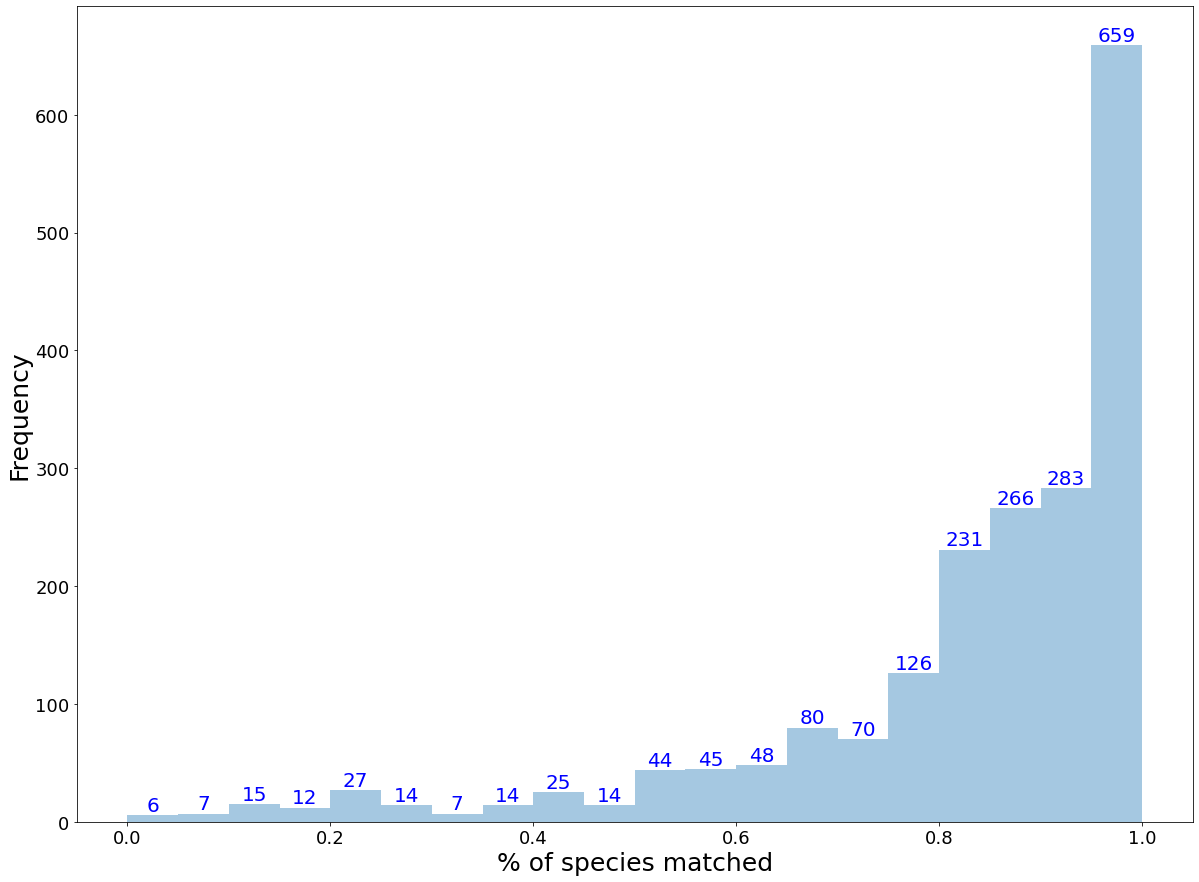

In [27]:
def numCorrectlyIndexed(doneAndNotDoneTuples):
    x = list(map(lambda x: x[0]/sum(x) if sum(x) > 0 else 0,doneAndNotDoneTuples))
    g = sns.distplot(x, hist=True,kde=False,bins=20)
    plt.ylabel('Frequency', fontsize = 25) # x-axis label with fontsize 15
    plt.xlabel('% of species matched', fontsize = 25) # y-axis label with fontsize 15
    for p in g.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        g.annotate(str(int(y)), (x.mean(), y), ha='center', va='bottom',fontsize=20,c='b') # set the alignment of the text
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
results = getResultsForCategory(resultExact)[1]
results = list(map(lambda x: [x[0],len(x[1])],results))
numCorrectlyIndexed(results)

In [7]:
import itertools
results = getResultsForCategory(resultExact)[1]
results = set(itertools.chain(*map(lambda x: x[1],results)))
results

{'',
 'Sum',
 'lacewings',
 'filter-feeding, minnow-like fishes',
 'rabbit carcass (L. californicus)',
 'emergent plants',
 'copepods',
 'T. argenteus',
 'Phoronid',
 'Eristalis intricarius',
 'clams',
 'predatory benthic fishes',
 'tundra vegetation',
 'young fish',
 'cacti (including seeds and fruits)',
 'Prinospio sp.2',
 'Elateroidea sp2',
 'predatory fishes',
 'sub-surface deposit-feeding polychaetes',
 "Chironomid type 'Diamesid blond'",
 'sedentary polychaetes',
 'C. semifascia',
 'angiosperms',
 'S. borellii',
 'Orychmontia sp.',
 'mosquito larva',
 '0',
 'Neochrysocharis arizonensis',
 'C. nigropunctata',
 'E. fusiformis',
 'rhoado',
 'berry crop',
 'Scaly-breasted Thrasher',
 'Coccinella 7-punctata',
 'Unidentified green algae',
 'Large benthopelagic fishes',
 'P. turbida larvae',
 'benthic diatoms',
 'long-crested jay',
 'upper air animals--birds and bats, insectivorous, carnivorous',
 'Early YOY alewife',
 'Encyrtid',
 'Empidae spB',
 'Woodpigeon',
 'Platypena scabra',
 'he

In [8]:
for item in results:
    if 'seal' in item:
        print(item)

ringed seals
Weddel seals
harbor seals
harbour seal
Crabeater seals
Leopard seals
seals
Weddell seals
whales, crabeater seals
leopard seals
crabeater seals
bearded seals
whales - crabeater seals


In [9]:
(659+283+266+231) 

1439

In [10]:
(659) / 1993

0.33065730055193177

4


Text(0.5, 0, 'Generalisation')

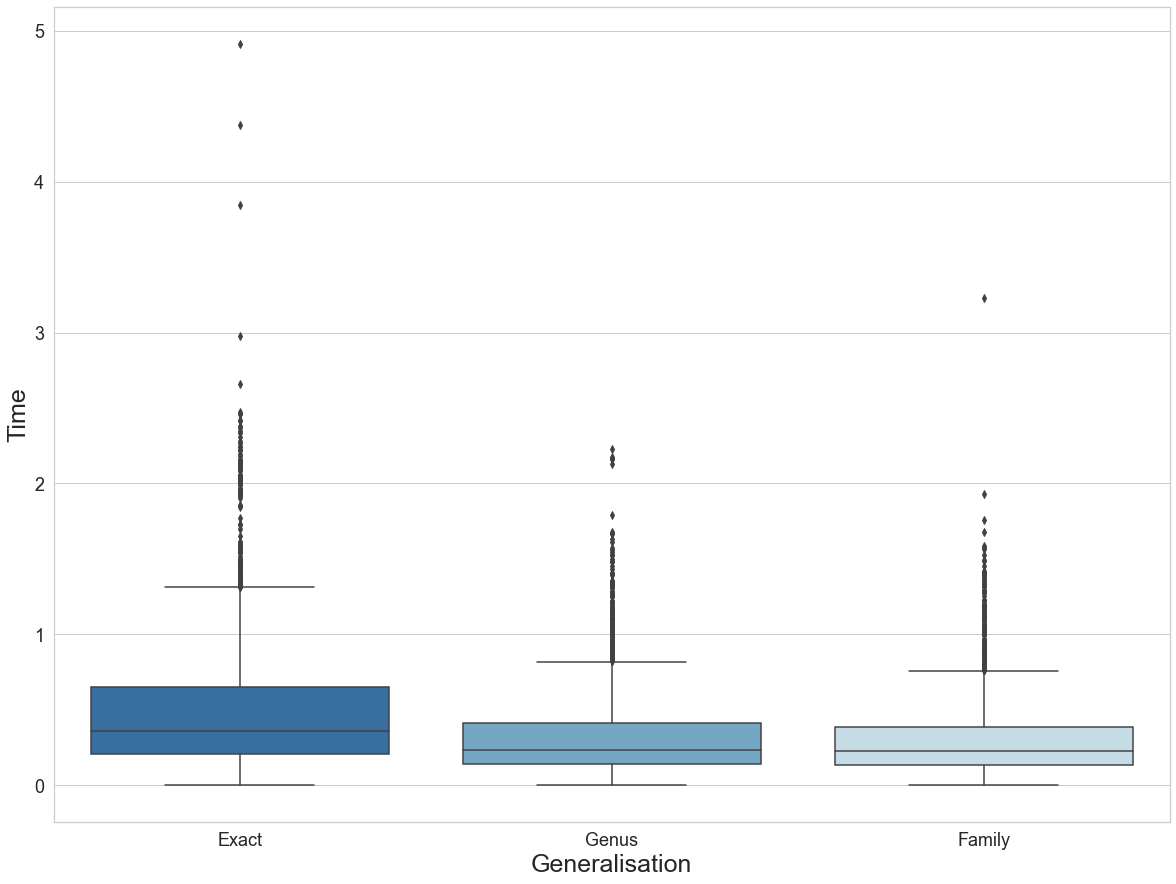

In [50]:
def prepBuildTime(buildTime):
#     buildTime = list(map(lambda x: x[1],buildTime))
    buildTime = list(map(lambda x: x[1] / x[0] if x[0] > 0 else 0 ,buildTime))
    return buildTime

crush = []
exact = list(map(lambda x: ["Exact",x], prepBuildTime(getResultsForCategory(resultExact)[0])))
genus = list(map(lambda x: ["Genus",x], prepBuildTime(getResultsForCategory(resultGenus)[0])))
family = list(map(lambda x: ["Family",x], prepBuildTime(getResultsForCategory(resultFamily)[0])))
# print(exact[0:10])
# genus = []
# family = []
print(len(list(filter(lambda x: x[1] >= 12,family))))
family = list(filter(lambda x: x[1] < 12, family))
crush = [*exact,*genus,*family]
dataSet = pd.DataFrame(crush,columns=['Generalisation','Time'])
ax = sns.boxplot(x="Generalisation", y="Time", data=dataSet,palette=sns.color_palette("RdBu", n_colors=7)[::-1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Time', fontsize = 25) # x-axis label with fontsize 15
plt.xlabel('Generalisation', fontsize = 25) # y-axis label with fontsize 15

[]
[]
[]


Text(0.5, 111.5, 'Generalisation')

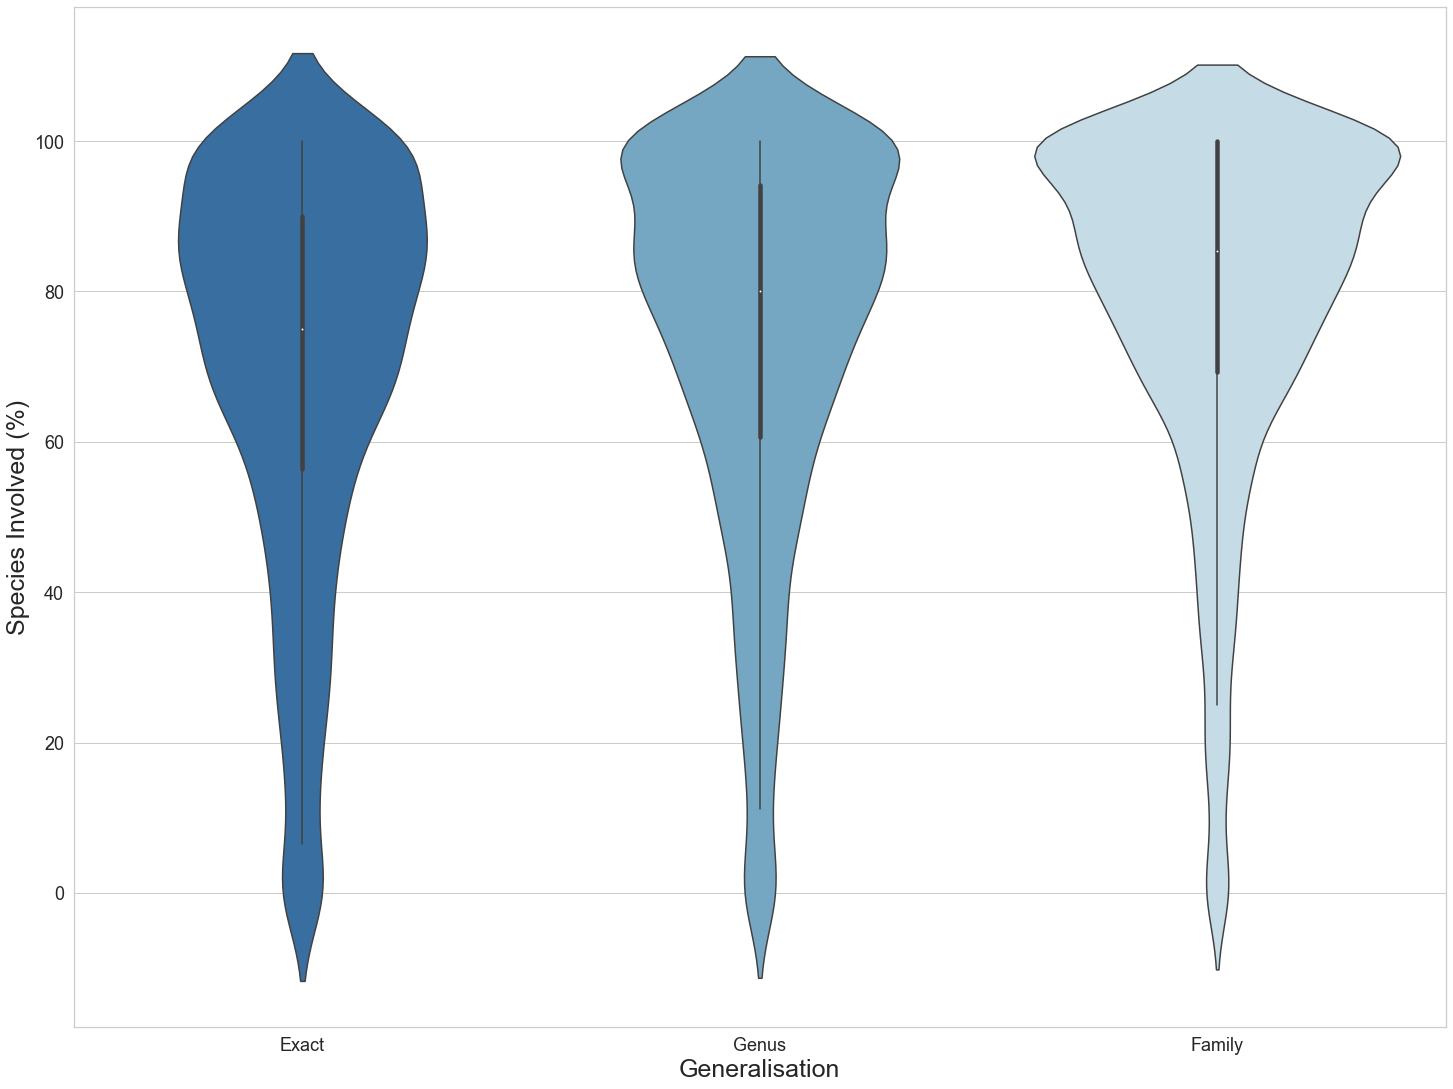

In [57]:
def calculateSpeciesPerRecord(results):
    generated,real = results
    generated = list(map(lambda x: x[1],generated))
    generated = list(set(itertools.chain(*generated)))
    real = list(set(itertools.chain(*real)))
    if len(real) == 0: return 0 
    return 100*len(generated) / len(real)   

def calculateSpeciesIncluded(results):
    matched = list(zip(results[0],results[1]))
    matched = list(map(calculateSpeciesPerRecord,matched))
    print(list(filter(lambda x: x < 0,matched)))
    return matched

crush = []
# calculateSpeciesIncluded(getResultsForCategory(resultExact)[3:5])
exact = list(map(lambda x: ["Exact",x], calculateSpeciesIncluded(getResultsForCategory(resultExact)[3:5])))
genus = list(map(lambda x: ["Genus",x], calculateSpeciesIncluded(getResultsForCategory(resultGenus)[3:5])))
family = list(map(lambda x: ["Family",x], calculateSpeciesIncluded(getResultsForCategory(resultFamily)[3:5])))
# genus = []
# family = []
crush = [*exact,*genus,*family]
dataSet = pd.DataFrame(crush,columns=['Generalisation','Species Involved (%)'])

fig = plt.figure()
ax = sns.violinplot(x="Generalisation", y="Species Involved (%)", data=dataSet,palette=sns.color_palette("RdBu", n_colors=7)[::-1])


# This should be called after all axes have been added
fig.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Species Involved (%)', fontsize = 25) # x-axis label with fontsize 15
plt.xlabel('Generalisation', fontsize = 25) # y-axis label with fontsize 15